##### Implimentation  of Missing Value Handling, Encoding, Outliers Handling for linear model in Python

In [2]:
# Import librarires
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [3]:
data = {
    'Age': [25, 30, np.nan, 35, 40, np.nan],
    'Salary': [50000, 54000, 58000, np.nan, 62000, 60000],
    'City': ['Delhi', 'Mumbai', np.nan, 'Delhi', 'Pune', np.nan]
}


In [4]:
df = pd.DataFrame(data)

In [5]:
df

,Age,Salary,City
0,25.0,50000.0,Delhi
1,30.0,54000.0,Mumbai
2,NaN,58000.0,NaN
3,35.0,NaN,Delhi
4,40.0,62000.0,Pune
5,NaN,60000.0,NaN


###  1. Missing value Handling

In [6]:
#Techniques to Handle Missing Values
# 1.Remove Row/Columns

df_drop = df.dropna()
print("\nAfter Dropping Missing Values:")
print(df_drop)


After Dropping Missing Values:
    Age   Salary    City
0  25.0  50000.0   Delhi
1  30.0  54000.0  Mumbai
4  40.0  62000.0    Pune


In [7]:
# 2. Fill Missing Values with Mean / Median / Mode 

# Use of mean imputation
num_imputer = SimpleImputer(strategy='mean')
df[['Age', 'Salary']] = num_imputer.fit_transform(df[['Age', 'Salary']])

# Use of mode imputation
cat_imputer = SimpleImputer(strategy='most_frequent')
df[['City']] = cat_imputer.fit_transform(df[['City']])

print(df)

    Age   Salary    City
0  25.0  50000.0   Delhi
1  30.0  54000.0  Mumbai
2  32.5  58000.0   Delhi
3  35.0  56800.0   Delhi
4  40.0  62000.0    Pune
5  32.5  60000.0   Delhi


###  2. Encoding

#### What is Encoding?
Encoding means converting categorical (text) data into numeric form
so that a machine learning model can understand and process it.
ML models cannot handle text directly, they only work with numbers.

1. Label Encoding : Each category (word) is replaced with a unique number.
Use for: Ordinal data like(high,medium,Low)

2️. One Hot Encoding : Creates separate columns for each category and marks 1 or 0.

3️. Ordinal Encoding : If the categories have a natural order, assign numbers accordingly.

4️. Binary Encoding : First, convert categories into numbers,
then represent them in binary format.

5️. Target Encoding (Mean Encoding) : Replace a category with the average value of the target variable for that category.

In [54]:
data = pd.read_csv("C:\\Users\\Admin\\Downloads\\04. Placement Data.xls")

In [55]:
data.head()

,Unnamed: 0,grade,cgpa,iq,communication,technical_knowledge,placement
0,0,B,7.34,124,1,7,0
1,1,D,8.88,112,1,5,0
2,2,C,7.95,85,8,8,0
3,3,B,6.42,103,8,8,1
4,4,A,6.10,98,6,9,1


In [56]:
data = data.drop("Unnamed: 0", axis =1)

In [57]:
data.head()

,grade,cgpa,iq,communication,technical_knowledge,placement
0,B,7.34,124,1,7,0
1,D,8.88,112,1,5,0
2,C,7.95,85,8,8,0
3,B,6.42,103,8,8,1
4,A,6.10,98,6,9,1


In [61]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
data['grade'] = le.fit_transform(data['grade'])

In [62]:
data.head()

,grade,cgpa,iq,communication,technical_knowledge,placement
0,1,7.34,124,1,7,0
1,3,8.88,112,1,5,0
2,2,7.95,85,8,8,0
3,1,6.42,103,8,8,1
4,0,6.10,98,6,9,1


In [63]:
# One hot Encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
ohe.fit_transform(df[['City']])

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [64]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
ohe.fit_transform(data[['grade']])

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [9]:
# Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

data = {'Rating': ['Poor', 'Average', 'Good', 'Excellent', 'Good']}
df = pd.DataFrame(data)

encoder = OrdinalEncoder(categories=[['Poor', 'Average', 'Good', 'Excellent']])

df['Rating'] = encoder.fit_transform(df[['Rating']])

print(df)

   Rating
0     0.0
1     1.0
2     2.0
3     3.0
4     2.0


###  3. Outliers Handling for linear model

In [10]:
## Outliers are data points that are significantly different from other data points.

##### Implimentation

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Area_sqft': [1000, 1200, 1500, 1800, 2000, 2200, 2500, 3000, 3500, 10000],
    'Price': [50, 60, 80, 90, 110, 120, 140, 170, 200, 1000]
}

df = pd.DataFrame(data)
print(df)

   Area_sqft  Price
0       1000     50
1       1200     60
2       1500     80
3       1800     90
4       2000    110
5       2200    120
6       2500    140
7       3000    170
8       3500    200
9      10000   1000


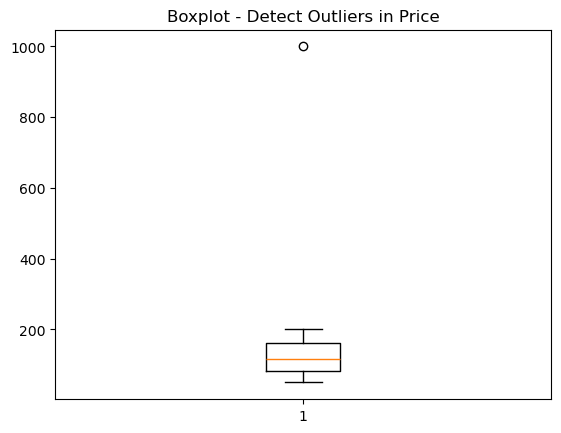

In [25]:
#Visualize the data - Finding Outliers using Boxplot

import matplotlib.pyplot as plt

plt.boxplot(df['Price'])
plt.title("Boxplot - Detect Outliers in Price")
plt.show()

In [27]:
#  Detect Outliers using IQR (Interquartile Range)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['Price'] < lower_limit) | (df['Price'] > upper_limit)]
print("Outliers:\n", outliers)

Outliers:
    Area_sqft  Price
9      10000   1000


In [29]:
# 2. Handling Outliers (Remove)

df_clean = df[(df['Price'] >= lower_limit) & (df['Price'] <= upper_limit)]


In [30]:
df_clean

,Area_sqft,Price
0,1000,50
1,1200,60
2,1500,80
3,1800,90
4,2000,110
5,2200,120
6,2500,140
7,3000,170
8,3500,200


In [34]:
# Cap Outlier (Winsorization)
# Instead of removing outliers, Winsorization replaces them with the nearest acceptable value (limit).

df['Price'] = df['Price'].clip(lower_limit, upper_limit)

In [35]:
df

,Area_sqft,Price
0,1000,50.0
1,1200,60.0
2,1500,80.0
3,1800,90.0
4,2000,110.0
5,2200,120.0
6,2500,140.0
7,3000,170.0
8,3500,200.0
9,10000,282.5


In [36]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Before removing outliers
X = df[['Area_sqft']]
y = df['Price']
model_before = LinearRegression().fit(X, y)
print("Before Removing Outliers - Coefficient:", model_before.coef_)

# After removing outliers
X_clean = df_clean[['Area_sqft']]
y_clean = df_clean['Price']
model_after = LinearRegression().fit(X_clean, y_clean)
print("After Removing Outliers - Coefficient:", model_after.coef_)


Before Removing Outliers - Coefficient: [0.02479483]
After Removing Outliers - Coefficient: [0.06068937]
